In [117]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout, Bidirectional
from keras import optimizers


In [118]:
data = pd.read_csv('air-quality(1).csv')
data.head(3)

,Last_Check,Current_Particulate_Matter_2_5_,PM_2_5_10_Minute_Avg_,PM_2_5_30_Minute_Avg_,PM_2_5_1_Hour_Avg_,PM_2_5_6_Hour_Avg_,PM_2_5_24_Hour_Avg_,PM_2_5_One_Week_Avg_,Temp__F_,Humidity____,Pressure__mbar_,Uptime__Seconds_,RSSI__WiFi_signal_strength_dBm_,Age_of_Data_at_Check__minutes_,ObjectId
0,2018/09/27 19:48:03+00,22.48,22.05,18.33,15.50,10.25,11.44,13.81,88,59,1002.78,3060,-84,1.0,1
1,2018/09/27 19:59:52+00,23.00,22.47,19.20,16.24,10.46,11.49,13.82,88,58,1003.02,3770,-84,0.0,2
2,2018/10/02 14:43:38+00,9.32,10.53,13.64,15.65,18.14,14.53,12.89,86,55,1011.93,7123,-92,0.0,3


In [119]:
data.shape

(12489, 15)

In [120]:
data_selec = data[:11390]

In [121]:
data_selec.shape

(11390, 15)

In [122]:
train = data_selec[:8000]
rest = data_selec[8000:]
val = rest[:int(len(rest)*0.5)]
test = rest[int(len(rest)*0.5):]

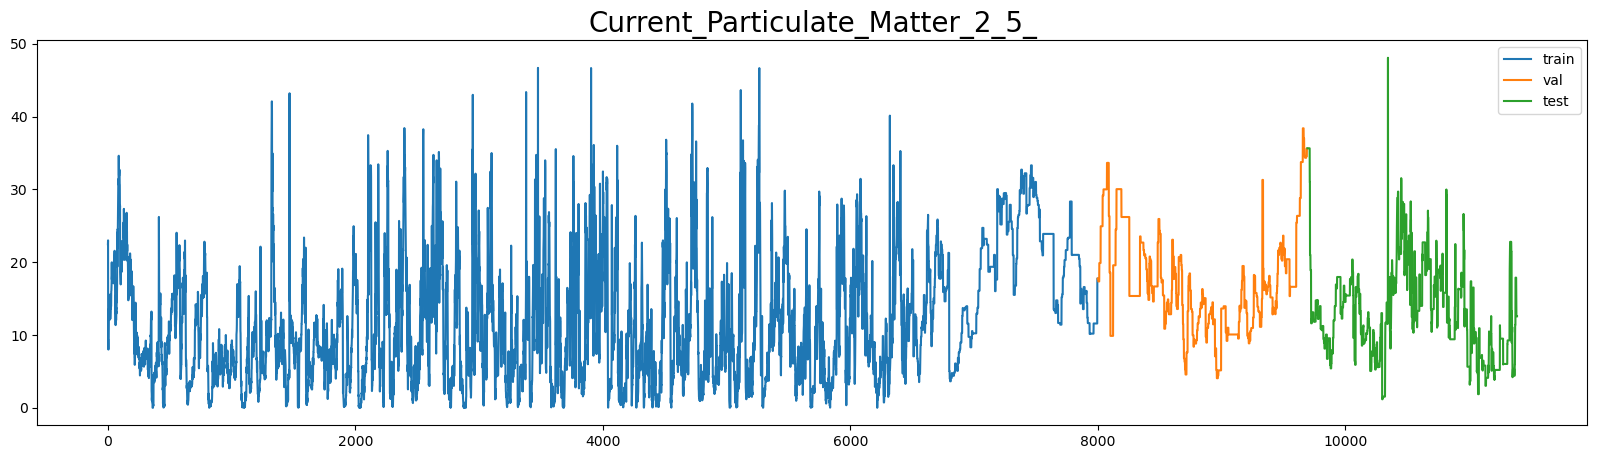

In [123]:
sns.reset_orig()
plt.figure(figsize = (20,5))
plt.title('Current_Particulate_Matter_2_5_', fontsize = 20)
plt.plot(train['Current_Particulate_Matter_2_5_'], label = 'train')
plt.plot(val['Current_Particulate_Matter_2_5_'], label = 'val')
plt.plot(test['Current_Particulate_Matter_2_5_'], label = 'test')

plt.legend(fontsize = 10)
plt.show()

In [124]:
X_train = train.drop(columns = {'Current_Particulate_Matter_2_5_', 'Last_Check','Age_of_Data_at_Check__minutes_'}, axis = 1)
y_train = train.loc[:, ['Current_Particulate_Matter_2_5_']]

X_val = val.drop(columns = {'Current_Particulate_Matter_2_5_', 'Last_Check','Age_of_Data_at_Check__minutes_'}, axis = 1)
y_val = val.loc[:, ['Current_Particulate_Matter_2_5_']]

X_test = test.drop(columns = {'Current_Particulate_Matter_2_5_', 'Last_Check','Age_of_Data_at_Check__minutes_'}, axis = 1)
y_test = test.loc[:, ['Current_Particulate_Matter_2_5_']]

In [125]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(8000, 12)
(1695, 12)
(1695, 12)


In [126]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [127]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_val = scaler.transform(X_val)
x_test = scaler.transform(X_test)

In [128]:
x_train_sca = x_train[:].reshape(-1, 1, x_train.shape[1])
x_val_sca = x_val[:].reshape(-1, 1, x_val.shape[1])
x_test_sca = x_test[:].reshape(-1, 1, x_test.shape[1])

In [129]:
x_train_sca.shape

(8000, 1, 12)

# RNN

In [130]:
model_rnn = tf.keras.Sequential([
        SimpleRNN(100, return_sequences = True, activation = 'relu'),
        Dropout(0.1),
        SimpleRNN(50,return_sequences=False),
        Dropout(0.1),
        Dense(1)])

In [131]:
optim = tf.optimizers.Adam(lr=0.001, clipnorm=1.)

/Users/qidongfang/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [132]:
model_rnn.compile(loss='mse',
                 optimizer = optim, metrics = ['accuracy'])

In [133]:
%%time
model_rnn.fit(
         x_train_sca,y_train,
         batch_size = 128,
         epochs = 50,
         validation_data = (x_val_sca, y_val)
)

Epoch 1/50
63/63 [==============================] - 1s 5ms/step - loss: 115.4169 - accuracy: 0.0045 - val_loss: 87.6125 - val_accuracy: 0.0000e+00
Epoch 2/50
63/63 [==============================] - 0s 3ms/step - loss: 45.0741 - accuracy: 0.0046 - val_loss: 53.6440 - val_accuracy: 0.0000e+00
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 26.8918 - accuracy: 0.0054 - val_loss: 32.8172 - val_accuracy: 0.0000e+00
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 16.0248 - accuracy: 0.0056 - val_loss: 21.8750 - val_accuracy: 0.0000e+00
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 9.7239 - accuracy: 0.0055 - val_loss: 16.5179 - val_accuracy: 0.0000e+00
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 6.4510 - accuracy: 0.0051 - val_loss: 13.8181 - val_accuracy: 0.0000e+00
Epoch 7/50
63/63 [==============================] - 0s 2ms/step - loss: 5.1235 - accuracy: 0.0051 - val_loss: 12.4290 - val_a

KeyboardInterrupt: 

In [134]:
prediction = model_rnn.predict(x_val_sca)

In [135]:
r2 = r2_score(prediction,y_val)
mse = mean_squared_error(prediction, y_val)
print(r2)
print(mse)

0.7306807465573578
9.169899094820392


In [136]:
prediction = model_rnn.predict(x_test_sca)

In [137]:
pd.DataFrame(prediction).to_csv('rnn.csv',index = False)

In [139]:
#test performance
r2 = r2_score(prediction,y_test)
mse = mean_squared_error(prediction,y_test)
print(r2)
print(mse)

0.8171322261274256
6.678386705834464


# LSTM

In [96]:
model_lstm = tf.keras.Sequential([
    LSTM(100, return_sequences=True,activation='relu'),
    Dropout(0.1),
    LSTM(50,return_sequences=False),
    Dropout(0.1),
    Dense(1)
])

In [97]:
optim = tf.optimizers.Adam(lr=0.001, clipnorm=1.)

/Users/qidongfang/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [98]:
model_lstm.compile(loss='mse',
                  optimizer = optim, metrics = ['accuracy'])

In [99]:
%%time
model_lstm.fit(
      x_train_sca,y_train,
      batch_size = 128,
      epochs = 50,
      validation_data = (x_val_sca, y_val)  
)

Epoch 1/50
63/63 [==============================] - 2s 9ms/step - loss: 193.1615 - accuracy: 0.0031 - val_loss: 189.8926 - val_accuracy: 0.0000e+00
Epoch 2/50
63/63 [==============================] - 0s 4ms/step - loss: 92.8780 - accuracy: 0.0054 - val_loss: 81.3951 - val_accuracy: 0.0000e+00
Epoch 3/50
63/63 [==============================] - 0s 4ms/step - loss: 46.3428 - accuracy: 0.0054 - val_loss: 57.1630 - val_accuracy: 0.0000e+00
Epoch 4/50
63/63 [==============================] - 0s 4ms/step - loss: 30.5364 - accuracy: 0.0054 - val_loss: 41.9738 - val_accuracy: 0.0000e+00
Epoch 5/50
63/63 [==============================] - 0s 4ms/step - loss: 20.8128 - accuracy: 0.0054 - val_loss: 29.7578 - val_accuracy: 0.0000e+00
Epoch 6/50
63/63 [==============================] - 0s 4ms/step - loss: 13.8785 - accuracy: 0.0054 - val_loss: 22.5736 - val_accuracy: 0.0000e+00
Epoch 7/50
63/63 [==============================] - 0s 4ms/step - loss: 9.3691 - accuracy: 0.0054 - val_loss: 21.6923 - va

In [100]:
prediction_lstm = model_lstm.predict(x_val_sca)

In [101]:
r2 = r2_score(prediction_lstm, y_val)
mse = mean_squared_error(prediction_lstm, y_val)
print(r2)
print(mse)

0.7375334728688757
8.324427697304086


In [102]:
prediction_lstm = model_lstm.predict(x_test_sca)

In [103]:
pd.DataFrame(prediction_lstm).to_csv('lstm.csv',index = False)

In [104]:
r2 = r2_score(prediction_lstm, y_test)
mse = mean_squared_error(prediction_lstm,y_test)
print(r2)
print(mse)

0.7533398920045975
8.20275635784824


# GRU

In [105]:
model_gru = tf.keras.Sequential([
    GRU(100,return_sequences=True,activation='relu'),
    Dropout(0.1),
    GRU(50,return_sequences=False),
    Dropout(0.1),
    Dense(1)
])

In [106]:
optim = tf.optimizers.Adam(lr=0.001, clipnorm=1.)

/Users/qidongfang/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [107]:
model_gru.compile(loss = 'mse',
                 optimizer = optim, metrics = ['accuracy'])

In [108]:
%%time
model_gru.fit(
    x_train_sca, y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (x_val_sca, y_val)
)

Epoch 1/50
63/63 [==============================] - 3s 9ms/step - loss: 160.7122 - accuracy: 0.0043 - val_loss: 109.8212 - val_accuracy: 0.0000e+00
Epoch 2/50
63/63 [==============================] - 0s 4ms/step - loss: 55.3421 - accuracy: 0.0054 - val_loss: 58.2500 - val_accuracy: 0.0000e+00
Epoch 3/50
63/63 [==============================] - 0s 4ms/step - loss: 29.1593 - accuracy: 0.0054 - val_loss: 37.2740 - val_accuracy: 0.0000e+00
Epoch 4/50
63/63 [==============================] - 0s 4ms/step - loss: 17.3484 - accuracy: 0.0054 - val_loss: 24.8360 - val_accuracy: 0.0000e+00
Epoch 5/50
63/63 [==============================] - 0s 4ms/step - loss: 10.1820 - accuracy: 0.0054 - val_loss: 18.7640 - val_accuracy: 0.0000e+00
Epoch 6/50
63/63 [==============================] - 0s 4ms/step - loss: 6.4538 - accuracy: 0.0058 - val_loss: 15.8435 - val_accuracy: 0.0000e+00
Epoch 7/50
63/63 [==============================] - 0s 4ms/step - loss: 4.5463 - accuracy: 0.0059 - val_loss: 12.9445 - val

In [109]:
prediction_gru = model_gru.predict(x_val_sca)

In [110]:
r2 = r2_score(prediction_gru, y_val)
mse = mean_squared_error(prediction_gru, y_val)
print(r2)
print(mse)

0.738656462056924
8.440413299793494


In [111]:
prediction_gru = model_gru.predict(x_test_sca)

In [112]:
pd.DataFrame(prediction_gru).to_csv('gru.csv',index = False)

In [113]:
r2 = r2_score(prediction_gru, y_test)
mse = mean_squared_error(prediction_gru, y_test)
print(r2)
print(mse)

0.7967611248331703
6.830583083420782


In [114]:
model_rnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 1, 100)            11300     
                                                                 
 dropout_10 (Dropout)        (None, 1, 100)            0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 50)                7550      
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 18,901
Trainable params: 18,901
Non-trainable params: 0
_________________________________________________________________


In [115]:
model_gru.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 1, 100)            34200     
                                                                 
 dropout_14 (Dropout)        (None, 1, 100)            0         
                                                                 
 gru_3 (GRU)                 (None, 50)                22800     
                                                                 
 dropout_15 (Dropout)        (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 57,051
Trainable params: 57,051
Non-trainable params: 0
_________________________________________________________________


In [116]:
model_lstm.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 100)            45200     
                                                                 
 dropout_12 (Dropout)        (None, 1, 100)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_13 (Dropout)        (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 75,451
Trainable params: 75,451
Non-trainable params: 0
_________________________________________________________________
